In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

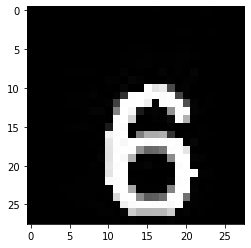

In [2]:
n = 1001
X = pickle.load(open("X.pickle", 'rb'))
plt.imshow(X[n], cmap ="gray")

In [3]:
y = pickle.load(open("y.pickle", 'rb'))
print(int(y[n]))

6


In [4]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# X_train = X_train / 255
# X_train = X_train.reshape(-1, 28, 28, 1)
# X_test = X_test / 255
# X_test = X_test.reshape(-1, 28, 28, 1)

# X_train.shape

In [5]:
# for feature in X:
#     X_train = np.append(X_train, feature)
#     plt.imshow(feature, cmap ="gray")
#     break

In [6]:
# for label in y:
#     y_train = np.append(y_train, label)
#     break

In [7]:
# X = X.append(X_train)
# X.shape

In [8]:
# X = X_train
# y = y_train

# # X = X/255

# model = Sequential()

# model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3,3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(64))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss="categorical_crossentropy",
#              optimizer="adam",
#              metrics=['accuracy'])

# model.fit(X, y, batch_size = 70, validation_split=0.1, epochs = 5)

In [10]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model = keras.Sequential()
model.add(keras.Input(shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

model.summary()


model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=16, epochs=15, validation_split=0.1)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_______________________________________________

In [11]:
model.save('cnn_model.h5')

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trin_labels[i]])